In [12]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt

from eda_utils import display_img_with_mask

In [13]:
%%time
df = pd.read_csv('../data/undefective_windows.csv', index_col=0)
df

CPU times: user 29.7 ms, sys: 4.17 ms, total: 33.9 ms
Wall time: 31.8 ms


,Index,ImageId,ClassId,instance_center_x,window_size
0,526,53abc091a.jpg,0,1194,160
1,3863,a733a2220.jpg,0,711,160
2,1189,083134687.jpg,0,215,160
3,4342,d8a2472a7.jpg,0,1176,160
4,3029,9e5b91357.jpg,0,264,160
...,...,...,...,...,...
6629,2312,f60a5bc2b.jpg,0,198,160
6630,5572,1c3efa3ca.jpg,0,1335,160
6631,2097,a9dcd6f0b.jpg,0,1405,160
6632,5311,77128fb28.jpg,0,521,160


CPU times: user 8.43 s, sys: 258 ms, total: 8.69 s
Wall time: 8.79 s


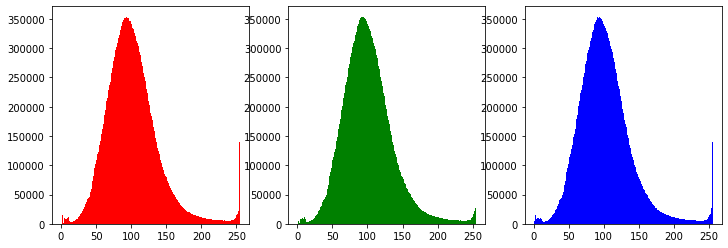

In [14]:
%%time

images = []

for row in df.sample(frac=0.1, random_state=42).itertuples():
    img = plt.imread(os.path.join('..', 'data', 'train_images', row.ImageId))
    hw = row.window_size // 2
    extra = row.window_size % 2
    min_x, max_x = int(row.instance_center_x - hw), int(row.instance_center_x + hw + extra)
    img = img[:, min_x:max_x]
    images.append(img)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, (ax, color) in enumerate(zip(axes.flat, ['red', 'green', 'blue'])):
    ax.hist(np.concatenate([np.ravel(img[:, :, i]) for img in images]),
            label=color, color=color, bins=256)

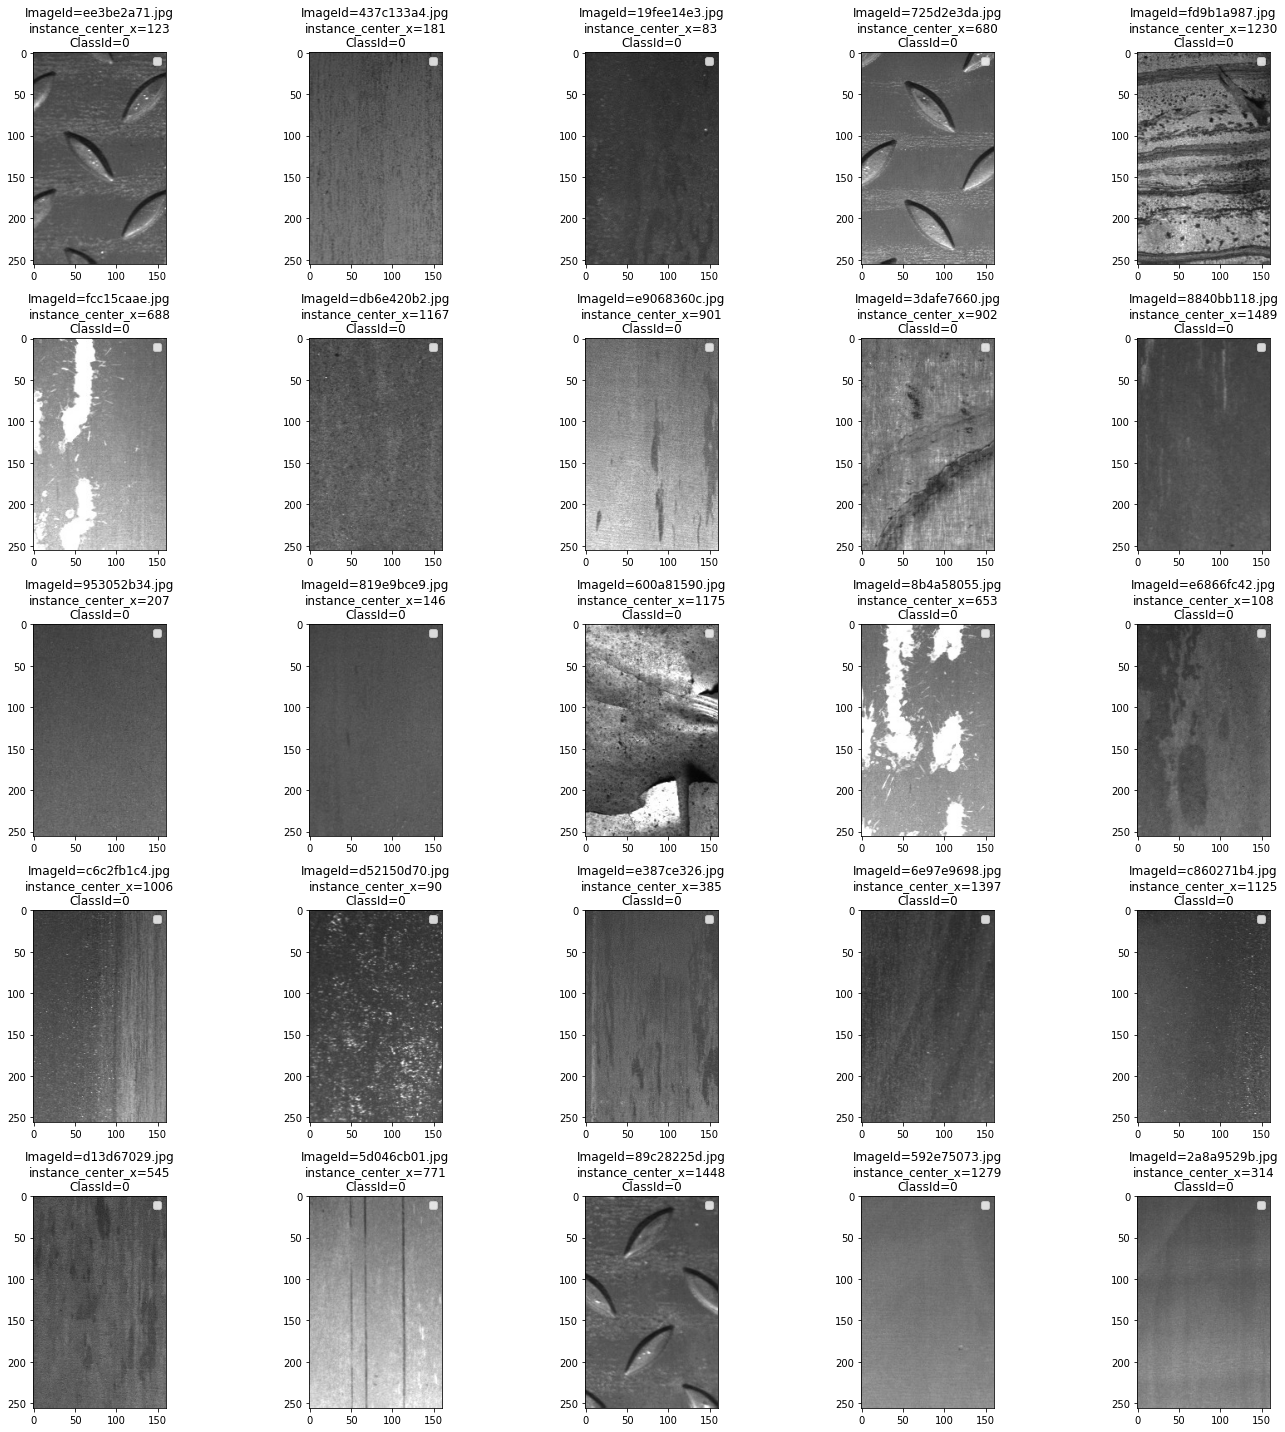

In [15]:
nrows = 5
fig, axes = plt.subplots(nrows, 5, figsize=(20, 4 * nrows))

train_df = pd.read_csv('../data/train.csv')
for ax, row in zip(axes.flat, df.sample(frac=1, random_state=13).itertuples()):
    ax.set_title(f'ImageId={row.ImageId}\ninstance_center_x={row.instance_center_x}\nClassId={row.ClassId}')
    hw = row.window_size // 2
    x_min, x_max = int(row.instance_center_x - hw), int(row.instance_center_x + hw)
    if x_min < 0:
        print(f'x_min={x_min} is off the edge, setting to 0')
        x_min = 0
    if x_max > 1600:
        print(f'x_max={x_max} is off the edge, setting to 1600')
        x_max = 1600
    display_img_with_mask(train_df, row.ImageId, 
                          x_window=(x_min, x_max), 
                          ax=ax)

plt.tight_layout()

In [16]:
df.ClassId.value_counts()

0    6634
Name: ClassId, dtype: int64